# ML Models Overview

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific warnings
import warnings
warnings.filterwarnings("ignore")

# Set up Notebook
sns.set(style="white")

## Data Exploration

Cross Industry Standard Process for Data Mining (CRISP-DM) breaks the process of data mining into six major steps:
1. Business understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment  

The sequence of the phases is not strict and moving back and forth between different phases as it is always required

In [2]:
# Load the iris dataset
iris = sns.load_dataset('iris')
# Check if the data was loaded correctly
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
128,6.4,2.8,5.6,2.1,virginica
90,5.5,2.6,4.4,1.2,versicolor
145,6.7,3.0,5.2,2.3,virginica
111,6.4,2.7,5.3,1.9,virginica
56,6.3,3.3,4.7,1.6,versicolor


In [3]:
# Get some info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Examine grouped data
iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [5]:
# Get descriptive statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


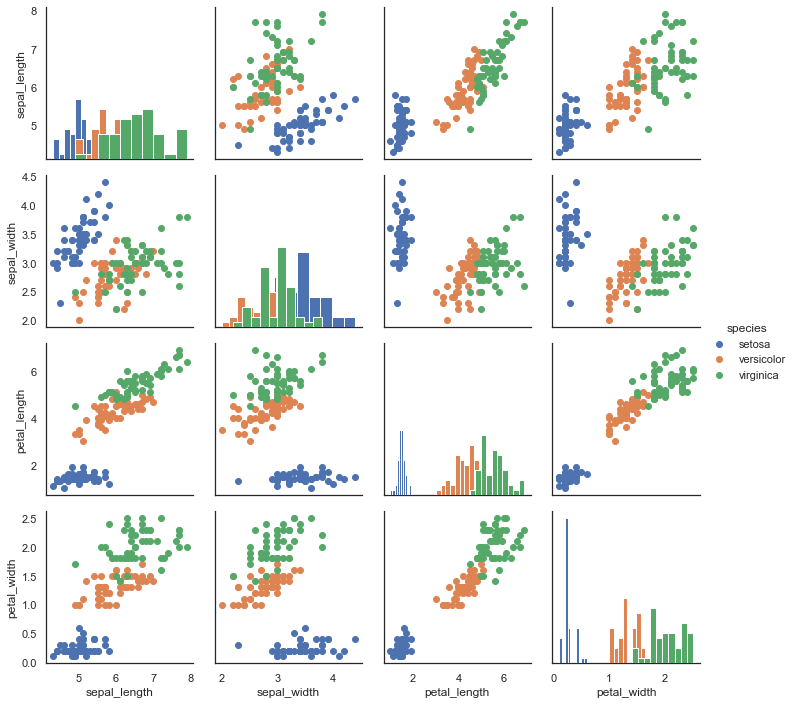

In [6]:
# Pair plot
g = sns.PairGrid(iris, hue='species')
g.map_diag(plt.hist) # with histograms down the diagonal
g.map_offdiag(plt.scatter) # and scatter plots of the diagonal
g.add_legend()


As we can see the three iris species cluster naturally in these dimensions, with a minimal overlap.  

## Scikit-Learn
Let's use sklearn to train a model and test for different machine learning algorithms.   
The sklearn module works directly on NumPy arrays and **not on a Pandas DataFrame**, so our next step is to build explicit data and label NumPy arrays.  
One caveat to this process is that the sklearn module expects two dimensional matrices (or arrays). Thus, if we have a vector (or one-dimensional array) for our data features, we must explicitly convert this to a two-dimensional matrix, which involves a call to the Numpy `np.reshape` method.

We can grab the underlying Numpy two-dimensional array from a DF by using the `values` attribute to select all four features

In [7]:
# From DF to array:
data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
# transform iris labels to integer [0:3]
labels = np.array([i//50 for i in range(iris.shape[0])])
label_names = ['Setosa', 'Versicolor', 'Virginica']

With these new data structures, we can begin to apply machine learning algorithms from the scikit-learn module. But let's first generate one scatter plot that displays a larger version of the sepal width versus petal width

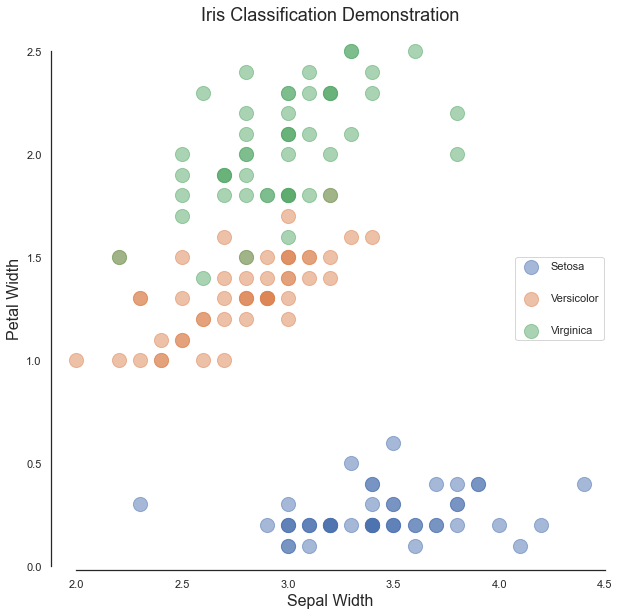

In [9]:
from matplotlib import cm

fig, aux = plt.subplots(figsize=(10, 10))

x = data[:, 1]
y = data[:, 3]
        
for idx in np.unique(labels):
    # Convert index into an int
    i = int(idx)
    plt.scatter(x[labels == i], y[labels == i], label=f'{label_names[i]}',
               s=200, alpha = .5, cmap=cm.coolwarm) 

# Decorate and clean plot
aux.set_xlabel('Sepal Width', fontsize=16)
aux.set_ylabel('Petal Width', fontsize=16)
aux.legend(loc = 7, labelspacing=2)
aux.set_title("Iris Classification Demonstration", fontsize=18)
sns.despine(offset=0, trim=True)

## Data Pre-Processing

In [15]:
from sklearn.model_selection import train_test_split

# Split data into training and testing
# Note that we ahve both 'data' and 'labels'
d_train, d_test, l_train, l_test = train_test_split(data, labels, test_size=0.4, random_state=23)
print(f'Training data length: {len(d_train)}\n'
     f'Test data length: {len(d_test)}')

Training data length: 90
Test data length: 60


### Data Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

# Create and fit scaler
sc = StandardScaler().fit(d_train)

d_train_sc = sc.transform(d_train)
d_test_sc = sc.transform(d_test)

for val, val_sc in zip(d_train[:10], d_train_sc[:10]):
    print(val, val_sc)

[6.7 3.  5.  1.7] [ 1.14223232 -0.02334012  0.71995791  0.65054316]
[4.7 3.2 1.6 0.2] [-1.40234464  0.44346228 -1.23485239 -1.34544153]
[5.8 2.6 4.  1.2] [-0.00282731 -0.95694493  0.14501371 -0.01478507]
[5.1 3.3 1.7 0.5] [-0.89342924  0.67686349 -1.17735797 -0.94624459]
[6.4 2.8 5.6 2.1] [ 0.76054578 -0.49014253  1.06492443  1.18280574]
[5.5 2.3 4.  1.3] [-0.38451385 -1.65714854  0.14501371  0.11828057]
[6.8 2.8 4.8 1.4] [ 1.26946117 -0.49014253  0.60496907  0.25134622]
[6.4 2.8 5.6 2.2] [ 0.76054578 -0.49014253  1.06492443  1.31587139]
[5.8 2.8 5.1 2.4] [-0.00282731 -0.49014253  0.77745233  1.58200268]
[6.3 2.5 4.9 1.5] [ 0.63331693 -1.19034613  0.66246349  0.38441187]


In [18]:
# Print out the min and max for each column in the array
print(np.amin(d_train_sc, axis=0))
print(np.amax(d_train_sc, axis=0))

[-1.91126003 -2.35735214 -1.57981891 -1.47850718]
[2.4145208  3.24427671 1.8123519  1.71506833]


With our data properly divided into training and testing samples, and the features appropriately scaled, we now change to the application of machine learning algorithms by using the appropriate estimator from the scikit-learn library.

### Classification

The first type of algorithm we will demonstrate is calssification, where we train an estimator to generate a model for the prediction of discrete labels.   
The following code cell we perform k-Nearst Neighbors (KNN) classification by using scikit-learn. The standard classification process in scikit-learn is to: 
1. first fit a model to the training data and 
2. to subsequently apply this model to predict values for the testing data.
3. Then we compute an accuracy measurement for our trained algotithm by using the `score` method

In [19]:
# Let's try KNN
from sklearn import neighbors

# The number of neghbors affects performance
nbrs = 5

# First we construct our model
knn = neighbors.KNeighborsClassifier(n_neighbors=nbrs)

# Now train our model
knn.fit(d_train_sc, l_train)

# Compute and display accuracy score
score = 100.0 * knn.score(d_test_sc, l_test)
print(f"KNN ({nbrs} neighbors) prediction accuracy = {score:5.1f}%")

KNN (5 neighbors) prediction accuracy =  96.7%


## Regression
The second machine learning we are going to try is regression using decision tree.   
Before generating a regression model, we must pre-process our data to identify our independent variables (or features) and our dependent variable (feature). Given a set of new independent variables, a regression model will predict the dependent variable.

In [20]:
# Split out first three columns as our independent variables
# Last colum becomes our dependent variable
ind_data = data[:, 0:3]
dep_data = data[:, -1]

# This is the amount to hold out for 'blind' testing
frac = 0.4

d_train, d_test, r_train, r_test \
    = train_test_split(ind_data, dep_data, test_size=frac, random_state=23)

In [21]:
# Import the decision tree
from sklearn import tree

# Construct the tree regressor
dtr = tree.DecisionTreeRegressor()

# Fit the regressor to the training data
dtr.fit(d_train, r_train)

# Compute and display score from test data
score = 100.0 * dtr.score(d_test, r_test)

print(f'DT regression accuracy = {score:5.1f}%')

DT regression accuracy =  91.1%


## Dimensionality Reduction

When confronted with a large, multi-dimensional data set, one approach is to simplify any subsequent analysis to reduce the number of dimensions (or features) that must be processed.  In some cases, features can be removed from an analysis based on business logic, or the features that contain the most information can be quantified somehow. More generally, however, we can employ dimensional reduction, a machine learning technique that quantifies relationships between the original dimensions (or features, attributes, or columns of a DataFrame) to identify new dimensions that better capture the inherent relationships within the data.

The standard technique to perform this is known as principal component analysis (PCA). This process effectively rotates the data into a new set of dimensions, and by ranking the importance of the new dimensions, we can optimally select fewer dimensions for use in other machine learning algorithms.

We can easily implement PCA by using scikit-learn. The PCA estimator requires one tunable hyper-parameter that specifies the target number of dimensions. This value can be arbitrarily selected, perhaps based on prior information, or it can be iteratively determined. After the model is created, we fit the model to the data and next create our new, rotated data set. This is demonstrated in the next code cell.

In [22]:
# Principal Component Analysis
from sklearn.decomposition import PCA

# First create our PCA model
# Fo now we assume two components to make plotting easier:
pca = PCA(n_components=2)

# Fit model to the data
pca.fit(data)

# Compute the transformed data (rotation to PCA space)
data_reduced = pca.transform(data)

# Need to modify to match number of PCA components
cols = ['PCA1', 'PCA2', 'Species']

# Now create a new DataFrame to hold the results
# First a temporary np.array
tmp_d = np.concatenate((data_reduced,
                        iris['species'].values.reshape((150, 1))), axis=1)
iris_pca = pd.DataFrame(tmp_d, columns = cols)

for idx, evr in enumerate(pca.explained_variance_ratio_):
    print(f'Component {idx} explains {100.0* evr:4.2f} of the original variance.')

Component 0 explains 92.46 of the original variance.
Component 1 explains 5.31 of the original variance.


At the end of the previous code cell, we measure the amount of the original variance (or spread) in the original data that is captured by each new dimension. As this example shows, these two new dimensions capture almost 98% of the variance in the original data. This means that any analysis that uses only these two new dimensions will closely represent the analysis if performed on the entire data.

Given the two new dimensions, we can also display how they are related to the original four dimensions (note that this isn't just a rotation, since we have actually reduced the number of dimensions).

In [23]:
# We can print out transformation matrix

# Original Attribute Names
c_names = ['SL', 'SW', 'PL', 'PW']

# For each principal component, print out the tranformation equation
for row in pca.components_:
    print(r" + ".join("{0:6.3f} * {1:s}".format(val, name) 
                      for val, name in zip(row, c_names)))

 0.361 * SL + -0.085 * SW +  0.857 * PL +  0.358 * PW
 0.657 * SL +  0.730 * SW + -0.173 * PL + -0.075 * PW
